In [25]:
#%load_ext autoreload
#%autoreload 2
import numpy as np
import re
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import textwrap
import scipy.stats as stats
import os

from sklearn import svm, datasets
from scipy import stats
from sklearn import neighbors, ensemble, linear_model, neural_network
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import scipy
from functools import partial

import matplotlib.pylab as pylab
import seaborn as sns
sns.set_style('whitegrid', {'legend.frameon':True})
sns.set_palette(sns.color_palette("Set1", 12))
#sns.set_context("paper")
fontsize = 12
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
  'axes.labelsize': fontsize,
  'axes.titlesize':fontsize,
  'axes.edgecolor':"0.3",
  'xtick.labelsize':fontsize,
  'ytick.labelsize':fontsize,
  'legend.fontsize':10,
  'font.size':fontsize,
  'font.family':'serif'}
pylab.rcParams.update(params)
plt.rc('axes', labelsize=fontsize) 

#plt.style.use('ggplot')
%matplotlib inline

import igraph
import cairo
from tqdm.notebook import tqdm
import pandas as pd
from pathlib2 import Path


In [26]:
work_dir = Path('..\..\data\SST')
file_name = 'corr_online_1979_2019_6h_resolution_0.75_window_15d_delay_7d.npy'
data = np.load(work_dir / file_name, mmap_mode = 'r') 
# mmap_mode позволяет работать с диска, не загружая полностью весь массив в память.

In [27]:
result_dir = work_dir / '1979_2019_6h_0.75resolution' / 'result'
result_dir.mkdir(exist_ok=True)

In [28]:
timeseries = pd.read_csv(work_dir / "1979_2019_6h_0.75resolution" / "times_1979_2019_6h_0.75resolution.txt", header = None)
timeseries = pd.to_datetime(timeseries[0])

In [29]:
timeseries

0       1979-01-01 00:00:00
1       1979-01-01 06:00:00
2       1979-01-01 12:00:00
3       1979-01-01 18:00:00
4       1979-01-02 00:00:00
                ...        
59895   2019-12-30 18:00:00
59896   2019-12-31 00:00:00
59897   2019-12-31 06:00:00
59898   2019-12-31 12:00:00
59899   2019-12-31 18:00:00
Name: 0, Length: 59900, dtype: datetime64[ns]

In [30]:
data.shape

(187, 187, 59900)

In [73]:
n, _, nt = data.shape

In [79]:
# Полезные данные начинаются с кадра номер 90
# Если считывать в режиме mmap, то вот так можно получить граф номер 110.
g = np.array(data[:, :, 110])

# Матрица симметричная
np.all(np.abs(g - g.T) < 1e-15)

True

In [82]:
# В массиве нет NaN
# Если запустить, то эта штука считается минуты 3-5, так как чтение с диска 16 Gb
np.all(~np.isnan(data))

True

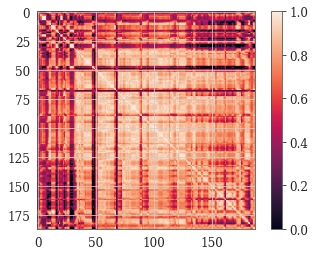

In [71]:
plt.imshow(g)
plt.colorbar()

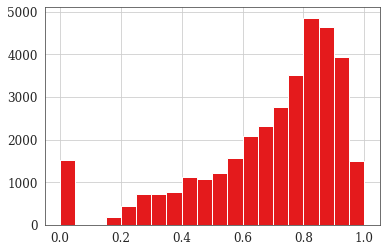

In [72]:
plt.hist(g.flatten(), bins = 20)
pass

In [90]:
nnz_fraction = np.zeros(nt, np.float32)
for i in tqdm(range(90, nt)):
    g = np.array(data[:, :, i])
    nnz_fraction[i] = float(np.sum(g > 0) - n) / (n * (n - 1))

Text(0, 0.5, 'Non zero fraction')

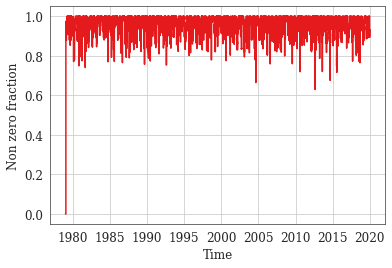

In [91]:
# Матрицы плотные всё же
# Возможно помогут отсечения по значению корреляции, чтобы они стали чуть более разреженными
plt.plot(timeseries, nnz_fraction)
plt.xlabel('Time')
plt.ylabel('Non zero fraction')

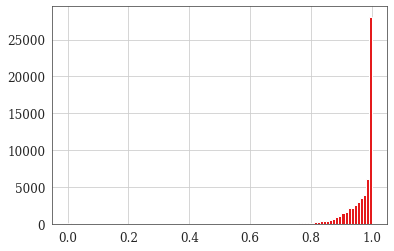

In [93]:
plt.hist(nnz_fraction, bins = 100)
pass